In [9]:
!python3 main.py

* * datamapping module loaded!
* * a_utils module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * d_del_del module loaded!
* * e_error_estimation module loaded!
* * f_star_wise module loaded!
* * datamapping module loaded!
* * main_modules module loaded!
* * datamapping module loaded!
* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration using 59_madore for R_v = 3.23 HST

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			______________________________________________________

     			Author: Shubham Mamgain (mshubham00@gmail.com) 
     			Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     			Supervisor II: Prof. Dr. Maria Rosa Cioni




			To begin the calibration process, store cleaned data at ./data/input/<file_name>.csv 

			For datafile selection (k) and columns mapping, edit ./data/datamapping.py file.

			Autosave

In [ ]:
import pandas as pd
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import table_out_path, mag, wes_show
import sys
#import os
n=59
dis_flag = ['_h', '_j', '_p']
dis_list = ['HST','IRSB', 'gplx']
groups = ['F07', 'S25']
file_name = f'{n}_IRSB_plx'

data_out_hF=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}_F/'
result_hF, r_reg_hF, res_hF, pre_hF = calibrated_result_(data_out_hF, n)
data_out_hS=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}_S/'
result_hS, r_reg_h, res_h, pre_h = calibrated_result_(data_out_hS, n)

data_out_g=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}_S/'
result_g, r_reg_g, res_g, pre_g = calibrated_result_(data_out_g, n)
data_out_j=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}_S/'
result_j, r_reg_j, res_j, pre_j = calibrated_result_(data_out_j, n)

M_m = [-2.277, -2.670, -2.874, -2.983, -3.198, -3.333, -3.377]
M_i = [-3.214, -3.944, -4.396, -4.706, -5.258, -5.558, -5.659]
M_s = [0.27, 0.21, 0.17, 0.14, 0.12, 0.12, 0.12]


output_path = table_out_path + f"/0_4_table_{n}_madore_compare.tex"
with open(output_path, "w") as f:
    # Redirect all print output to file
    original_stdout = sys.stdout
    sys.stdout = f

    print('\\rowcolor{gray!20}')
    print(f'& LLs & {mag[0]} & {mag[1]} & {mag[2]} & {mag[3]} & {mag[4]} & {mag[5]} & {mag[6]} \\\\')
    print('\\hline')
    print('\\rowcolor{gray!20}')
    print('\\multicolumn{9}{|c|}{Madore (2017) VI based calibration } \\\\ %')
    print('\\hline')
    print('\\multirow{4}{*}{\\rotatebox{90}{F07}}'+f'& $\\sigma_\\lambda$ & {M_s[0]} & {M_s[1]} & {M_s[2]} & {M_s[3]} & {M_s[4]} & {M_s[5]} & {M_s[6]} \\\\ %')
    print('\\cline{2-9}')

#    print('\\rowcolor{yellow!20}')
    # ROW 2 under multirow
    print(f'& $\\alpha_\\lambda$ & {M_m[0]} & {M_m[1]} & {M_m[2]} & {M_m[3]} & {M_m[4]} & {M_m[5]} & {M_m[6]} \\\\ %')

    # ROW 3 under multirow
#    print('\\rowcolor{yellow!20}')
    print(f'& $\\gamma_\\lambda$ & {M_i[0]} & {M_i[1]} & {M_i[2]} & {M_i[3]} & {M_i[4]} & {M_i[5]} & {M_i[6]} \\\\ %')
    print('\\hline')

    wes_show = ['VI','VJ', 'VH', 'RJ', 'RH']
    for col in wes_show: 
        r_hF = r_reg_hF[[f'{m}0{col}S' for m in mag]]
        r_h = r_reg_h[[f'{m}0{col}S' for m in mag]]
        reg_data = [r_hF,r_h]
        print('\\hline')
        print('\\rowcolor{gray!20}')
        print('\\multicolumn{9}{|c|}{', col,' based calibration } \\\\ %')
        for g, reg in enumerate(reg_data):
            slp = reg.iloc[0].values 
            inr = reg.iloc[1].values 
            sca = reg.iloc[4].values 
            slpdev = slp - M_m
            intdev = inr - M_i
            scadev = sca - M_s
            print('\\hline')
            print('\\multirow{4}{*}{\\rotatebox{90}{'+ groups[g]+'}}'+f'& $\\alpha_\\lambda$ & {slp[0]:.4f} &  {slp[1]:.4f} &  {slp[2]:.4f} &  {slp[3]:.4f} &  {slp[4]:.4f} &  {slp[5]:.4f} &  {slp[6]:.4f}\\\\')
#            print('\multirow{5}{*}{\rotatebox{90}{',groups[g],'}} & dsfsd \\\\')
#            print(f'& $\\alpha_\lambda$  &  {slp[0]:.4f} &  {slp[1]:.4f} &  {slp[2]:.4f} &  {slp[3]:.4f} &  {slp[4]:.4f} &  {slp[5]:.4f} &  {slp[6]:.4f} \\\\')
#            print(f'& $\gamma_\lambda$  &  {inr[0]:.4f} &  {inr[1]:.4f} &  {inr[2]:.4f} &  {inr[3]:.4f} &  {inr[4]:.4f} &  {inr[5]:.4f} &  {inr[6]:.4f} \\\\')
            print(f'& $\Delta \\alpha_\lambda$ &  {slpdev[0]:.4f} &  {slpdev[1]:.4f} &  {slpdev[2]:.4f} &  {slpdev[3]:.4f} &  {slpdev[4]:.4f} &  {slpdev[5]:.4f} &  {slpdev[6]:.4f} \\\\')
            print(f'& $\Delta \gamma_\lambda$ &  {intdev[0]:.4f} &  {intdev[1]:.4f} &  {intdev[2]:.4f} &  {intdev[3]:.4f} &  {intdev[4]:.4f} &  {intdev[5]:.4f} &  {intdev[6]:.4f} \\\\')
            print(f'& $\Delta \sigma_\lambda$ &  {scadev[0]:.3f} &  {scadev[1]:.3f} &  {scadev[2]:.3f} &  {scadev[3]:.3f} &  {scadev[4]:.3f} &  {scadev[5]:.3f} &  {scadev[6]:.3f} \\\\')
    #slp_h, intr_h = print_PL(r_reg_h, col, file_name, dis_flag[2])
    sys.stdout = original_stdout

print(output_path)

./docs/reports/thesis_version/chapters/content//0_4_table_59_madore_compare.tex


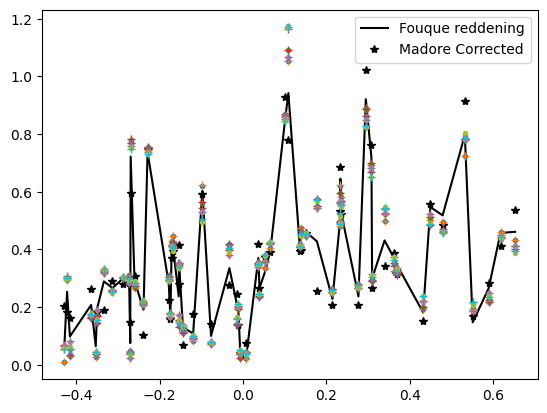

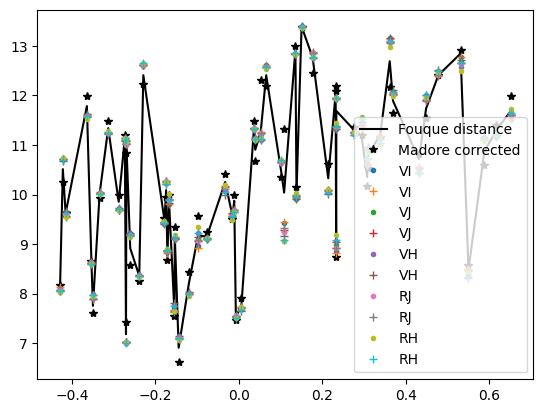

In [6]:
data_out_M=pd.read_csv(f'./data/input/{file_name}.csv')
M_dis_rd = data_out_M[['modu','excessu']]
dis = '_h'
r = result_h[[f'muS0{col}{dis}' for col in wes_show] + [f'rdS0{col}{dis}'for col in wes_show]]
rF = result_hF[[f'muS0{col}{dis}' for col in wes_show] + [f'rdS0{col}{dis}'for col in wes_show]]
M_dis_rd.style
plt.plot(data_out_M.logP - 1, data_out_M['EBV'], 'k-', label = 'Fouque reddening')
plt.plot(data_out_M.logP - 1, data_out_M['excessu'], 'k*', label = 'Madore Corrected')
for col in wes_show:
    plt.plot(data_out_M.logP - 1, rF[f'rdS0{col}{dis}'], '.')
    plt.plot(data_out_M.logP - 1, r[f'rdS0{col}{dis}'], '+')
plt.legend()
plt.show()
plt.plot(data_out_M.logP - 1, data_out_M['HST'], 'k-', label = 'Fouque distance')
plt.plot(data_out_M.logP - 1, data_out_M['modu'], 'k*', label = 'Madore corrected')
for col in wes_show:
    plt.plot(data_out_M.logP - 1, rF[f'muS0{col}{dis}'], '.', label = col)
    plt.plot(data_out_M.logP - 1, r[f'muS0{col}{dis}'], '+', label = col)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import *

data_out_hs=f'./data/processed/59_IRSB_plx_h_{R_v}/'
result_hs, r_reg_hs, res_hs, pre_hs = calibrated_result_(data_out_hs, 59)

n=71
dis_flag = ['_p', '_j']
dis_list = ['IRSB', 'gplx']
file_name = f'{n}_IRSB_plx'

#data_out_h=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}/'
#result_h, r_reg_h, res_h, pre_h = calibrated_result_(data_out_h, n)

data_out_g=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
result_g, r_reg_g, res_g, pre_g = calibrated_result_(data_out_g, n)
data_out_j=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}/'
result_j, r_reg_j, res_j, pre_j = calibrated_result_(data_out_j, n)

M_m = [-2.277, -2.670, -2.983, -3.198, -3.333, -3.377]
M_i = [-3.214, -3.944, -4.706, -5.258, -5.558, -5.659]
M_s = [0.27, 0.21, 0.14, 0.12, 0.12, 0.12]

for col in ['d']: 
    print('\hline')
    print('\\rowcolor{gray!20}')
    print(f' & {mag[0]} & {mag[1]} & {mag[2]} & {mag[3]} & {mag[4]} & {mag[5]} \\\\ %')
    print('\hline')
    print('\\rowcolor{yellow!20}')
    print('\multicolumn{7}{|c|}{ Madore (2017) PL Relations} \\\\ %')
    print('\hline')
    print('\\rowcolor{yellow!20}')
    print(f'$\\alpha$ & {M_m[0]:.4f} & {M_m[1]:.4f} & {M_m[2]:.4f} & {M_m[3]:.4f} & {M_m[4]:.4f} & {M_m[5]:.4f} \\\\ %')
    print(f'$ \gamma$ & {M_i[0]:.4f} & {M_i[1]:.4f} & {M_i[2]:.4f} & {M_i[3]:.4f} & {M_i[4]:.4f} & {M_i[5]:.4f} \\\\ %')
    print(f'$ \sigma$ & {M_s[0]:.3f} & {M_s[1]:.3f} & {M_s[2]:.3f} & {M_s[3]:.3f} & {M_s[4]:.3f} & {M_s[5]:.3f} \\\\ %')
    print('\hline')

wes_show = ['VI','VJ', 'VH', 'VK']
for col in wes_show: 
    #r_h = r_reg_h[[f'{m}0{col}S' for m in mag]]
    r_g = r_reg_g[[f'{m}0{col}S' for m in mag]]
    r_j = r_reg_j[[f'{m}0{col}S' for m in mag]]

    reg_data = [r_j, r_g]
    print('\hline')
    print('\\rowcolor{gray!20}')
    print('\multicolumn{7}{|c|}{', col,' based calibration (adjusted extinction law)} \\\\ %')
    for reg in reg_data:
        slp = reg.iloc[0].values 
        inr = reg.iloc[1].values 
        sca = reg.iloc[4].values 
        slpdev = slp - M_m
        intdev = inr - M_i
        scadev = sca - M_s
        print('\hline')
        print('\\rowcolor{yellow!20}')
        print(f'$\\alpha$  &  {slp[0]:.4f} &  {slp[1]:.4f} &  {slp[2]:.4f} &  {slp[3]:.4f} &  {slp[4]:.4f} &  {slp[5]:.4f}\\\\')
        print(f'$\Delta \\alpha$ &  {slpdev[0]:.4f} &  {slpdev[1]:.4f} &  {slpdev[2]:.4f} &  {slpdev[3]:.4f} &  {slpdev[4]:.4f} &  {slpdev[5]:.4f} \\\\')
        print(f'$\Delta \gamma$ &  {intdev[0]:.4f} &  {intdev[1]:.4f} &  {intdev[2]:.4f} &  {intdev[3]:.4f} &  {intdev[4]:.4f} &  {intdev[5]:.4f} \\\\')
        print(f'$\Delta \sigma$ &  {scadev[0]:.3f} &  {scadev[1]:.3f} &  {scadev[2]:.3f} &  {scadev[3]:.3f} &  {scadev[4]:.3f} &  {scadev[5]:.3f}\\\\')
    print('\hline')
    print('\\rowcolor{gray!20}')
print('\multicolumn{7}{|c|}{$\Delta X = X - X_M $} \\\\ %')

    #slp_h, intr_h = print_PL(r_reg_h, col, file_name, dis_flag[2])

\hline
\rowcolor{gray!20}
 & B & V & I & J & H & K \\ %
\hline
\rowcolor{yellow!20}
\multicolumn{7}{|c|}{ Madore (2017) PL Relations} \\ %
\hline
\rowcolor{yellow!20}
$\alpha$ & -2.2770 & -2.6700 & -2.9830 & -3.1980 & -3.3330 & -3.3770 \\ %
$ \gamma$ & -3.2140 & -3.9440 & -4.7060 & -5.2580 & -5.5580 & -5.6590 \\ %
$ \sigma$ & 0.270 & 0.210 & 0.140 & 0.120 & 0.120 & 0.120 \\ %
\hline
\hline
\rowcolor{gray!20}
\multicolumn{7}{|c|}{ VI  based calibration (adjusted extinction law)} \\ %
\hline
\rowcolor{yellow!20}
$\alpha$  &  -2.1967 &  -2.6385 &  -2.9919 &  -3.1649 &  -3.2934 &  -3.3397\\
$\Delta \alpha$ &  0.0803 &  0.0315 &  -0.0089 &  0.0331 &  0.0396 &  0.0373 \\
$\Delta \gamma$ &  0.0561 &  -0.0048 &  -0.0026 &  0.0337 &  -0.0373 &  -0.0091 \\
$\Delta \sigma$ &  0.088 &  0.101 &  0.284 &  0.124 &  0.128 &  0.132\\
\hline
\rowcolor{yellow!20}
$\alpha$  &  -2.0435 &  -2.5142 &  -2.9117 &  -3.1198 &  -3.2613 &  -3.3142\\
$\Delta \alpha$ &  0.2335 &  0.1558 &  0.0713 &  0.0782 &  0.0717

./docs/reports/plots/1_datacleaning/dataset_histogram.pdf


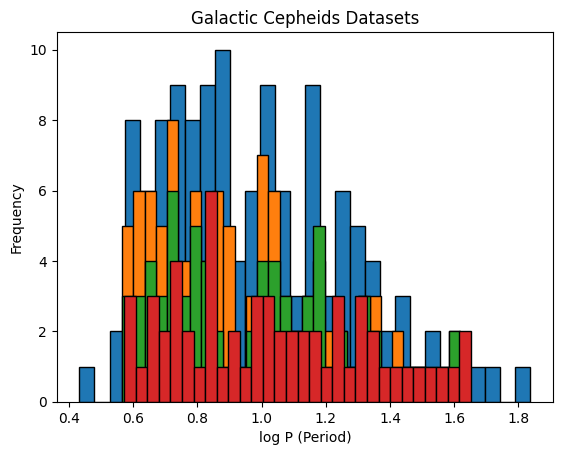

In [18]:
n=59
file_name = f'{n}_IRSB_plx'
data_out_g=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
result_g1, r_reg_g, res_g, pre_g = calibrated_result_(data_out_g, n)
n=71
file_name = f'{n}_IRSB_plx'
data_out_g=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
result_g2, r_reg_g, res_g, pre_g = calibrated_result_(data_out_g, n)
n=103
file_name = f'{n}_IRSB_plx'
data_out_g=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
result_g3, r_reg_g, res_g, pre_g = calibrated_result_(data_out_g, n)
n=129
file_name = f'{n}_IRSB_plx'
data_out_g=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
result_g4, r_reg_g, res_g, pre_g = calibrated_result_(data_out_g, n)
b=30
plt.hist(result_g4.logP, bins=b, edgecolor='black', label='129 Cepheids')
plt.hist(result_g3.logP, bins=b, edgecolor='black', label='103 Cepheids')
plt.hist(result_g2.logP, bins=b, edgecolor='black', label='71 Cepheids')
plt.hist(result_g1.logP, bins=b, edgecolor='black', label='59 Cepheids')
plt.xlabel("log P (Period)")
plt.ylabel("Frequency")
plt.title("Galactic Cepheids Datasets")
imgsave('dataset_histogram')
plt.show()

59_IRSB_plx _p
I Gaia sigma VJ [0.09  0.059 0.069 0.069 0.065 0.038 0.034]


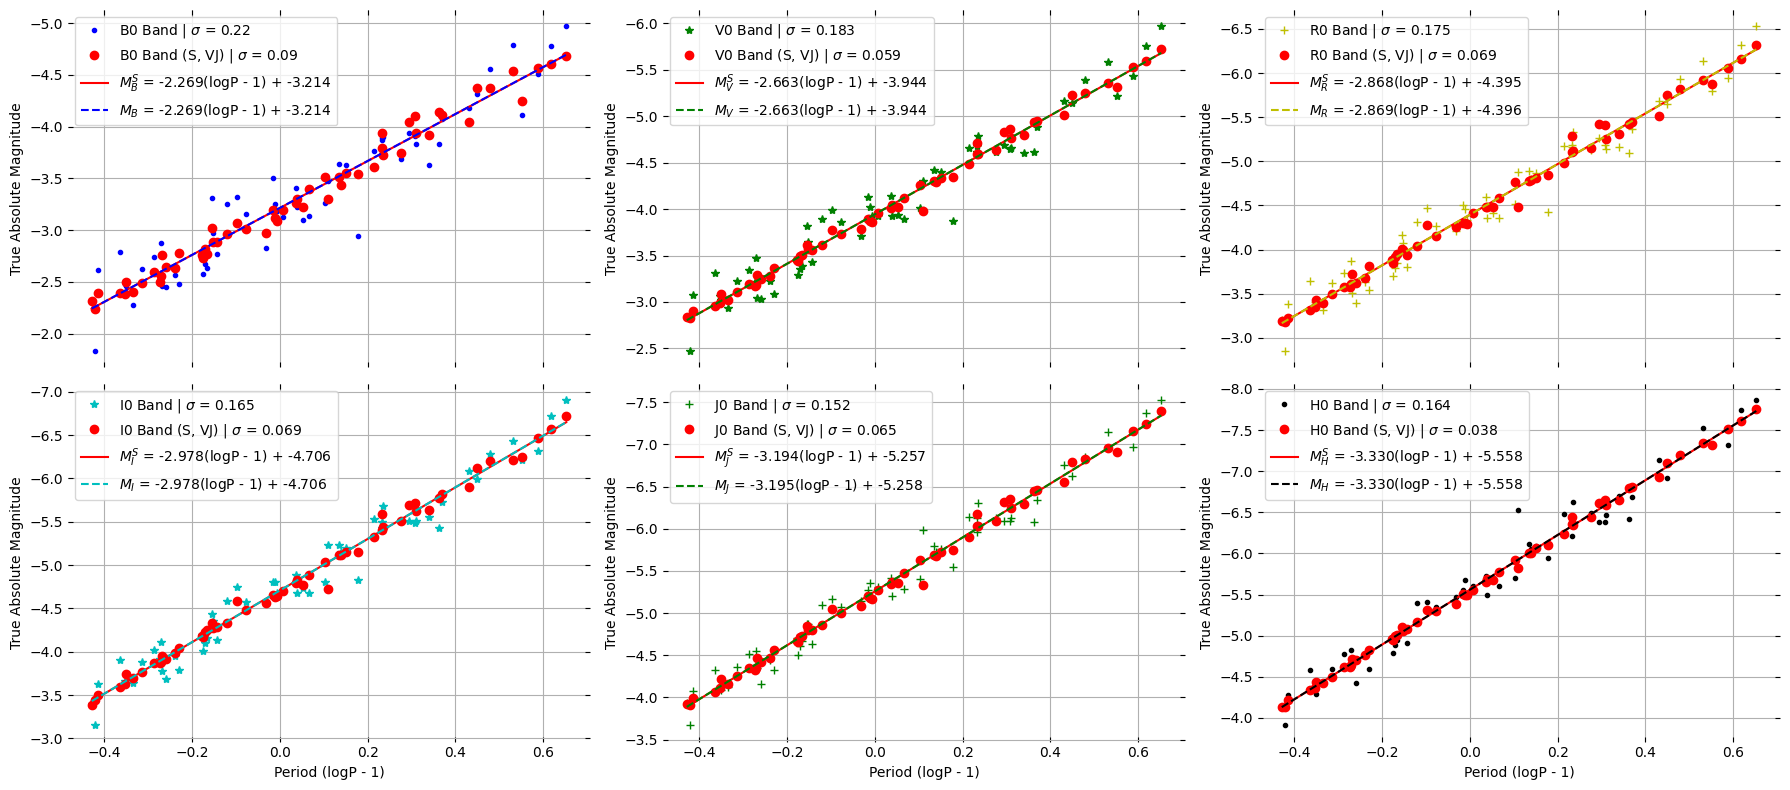

II IRSB sigma VJ [0.09  0.059 0.069 0.069 0.065 0.038 0.034]


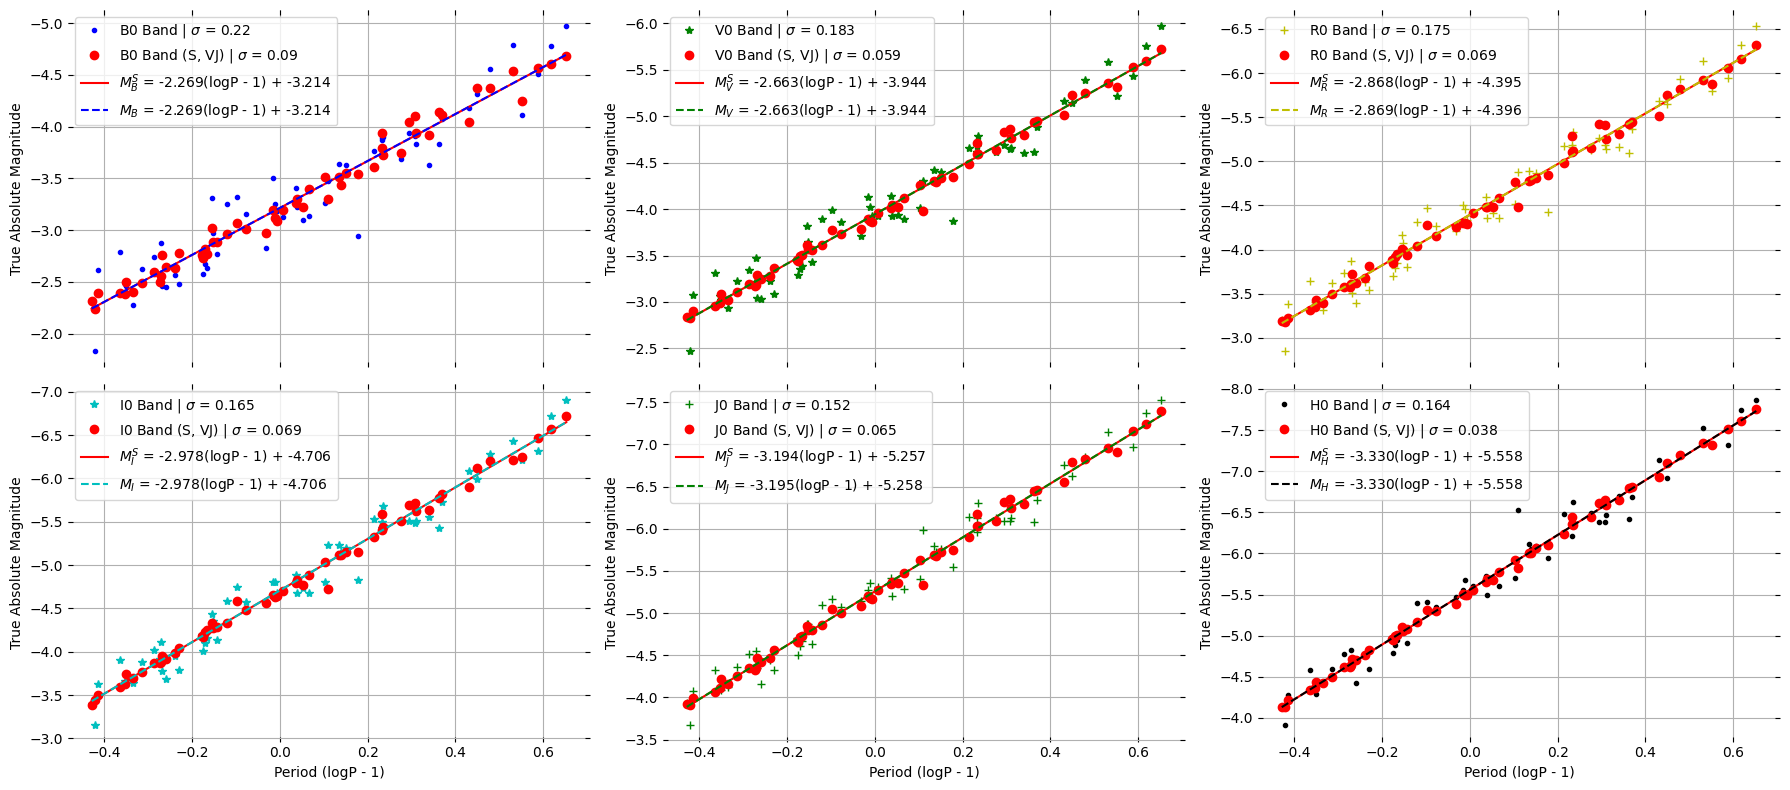

I Gaia sigma VH [0.074 0.055 0.068 0.089 0.096 0.077 0.076]


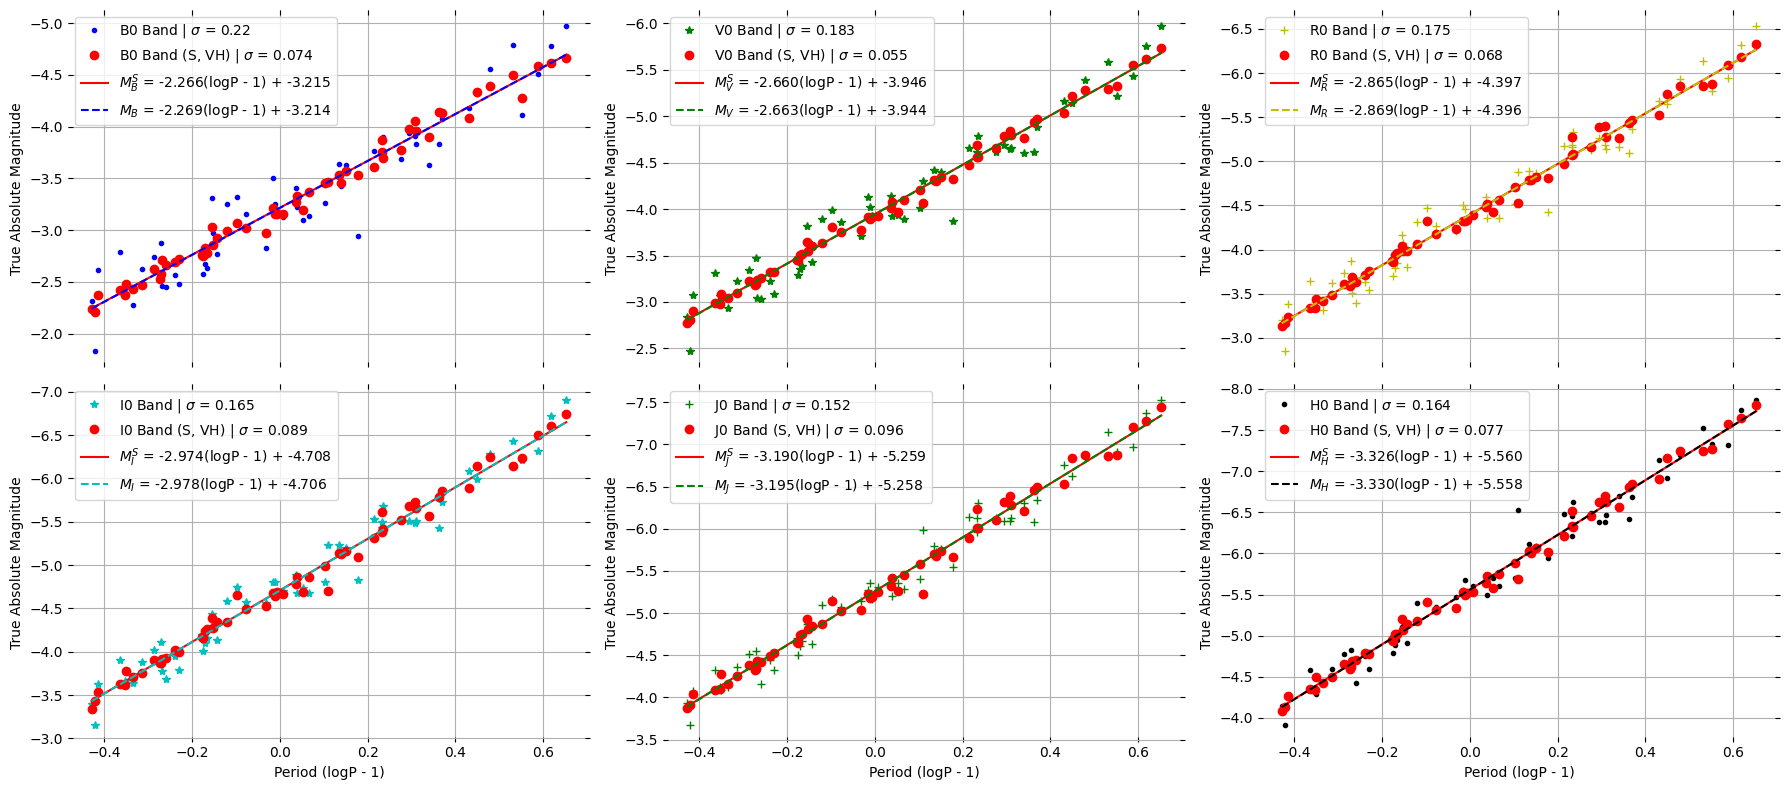

II IRSB sigma VH [0.074 0.055 0.068 0.089 0.096 0.077 0.076]


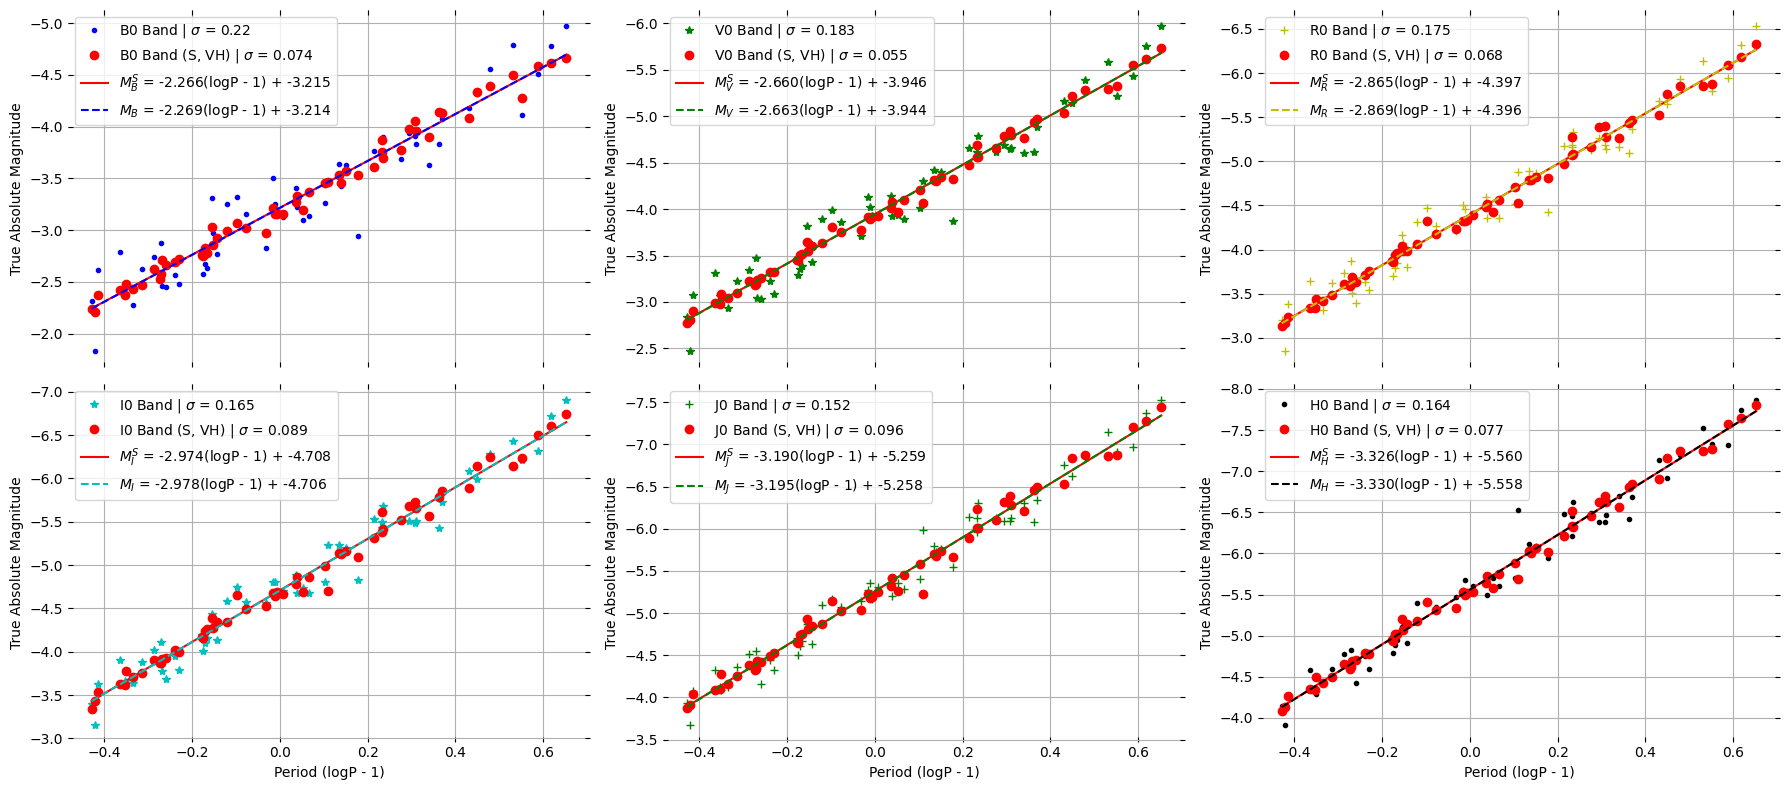

I Gaia sigma RJ [0.097 0.07  0.053 0.066 0.056 0.028 0.027]


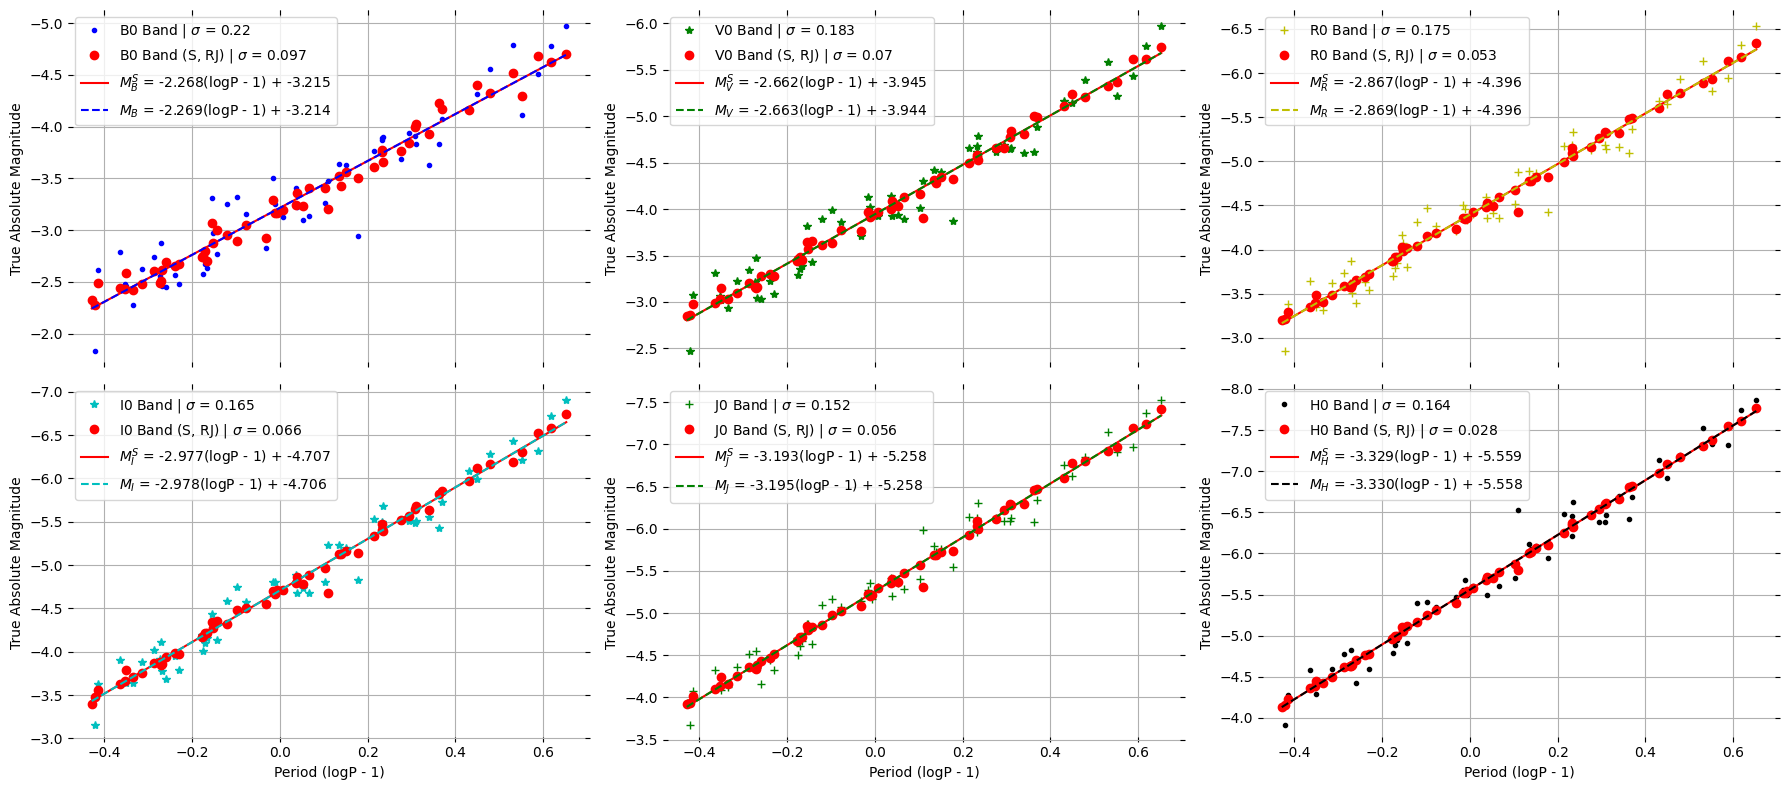

II IRSB sigma RJ [0.097 0.07  0.053 0.066 0.056 0.028 0.027]


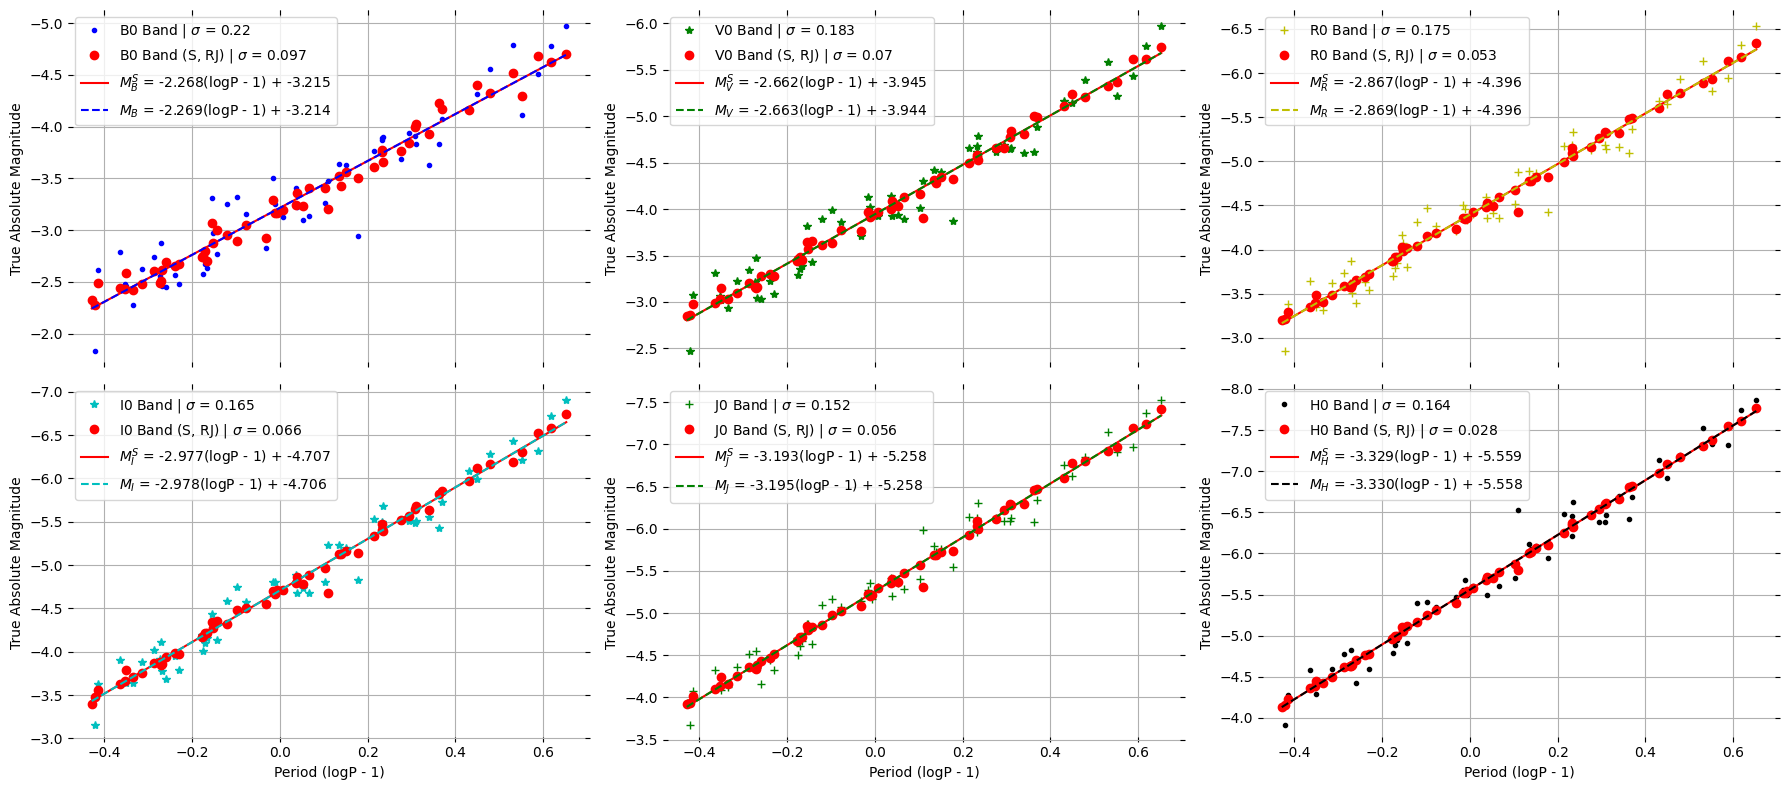

I Gaia sigma RH [0.056 0.047 0.066 0.09  0.101 0.084 0.081]


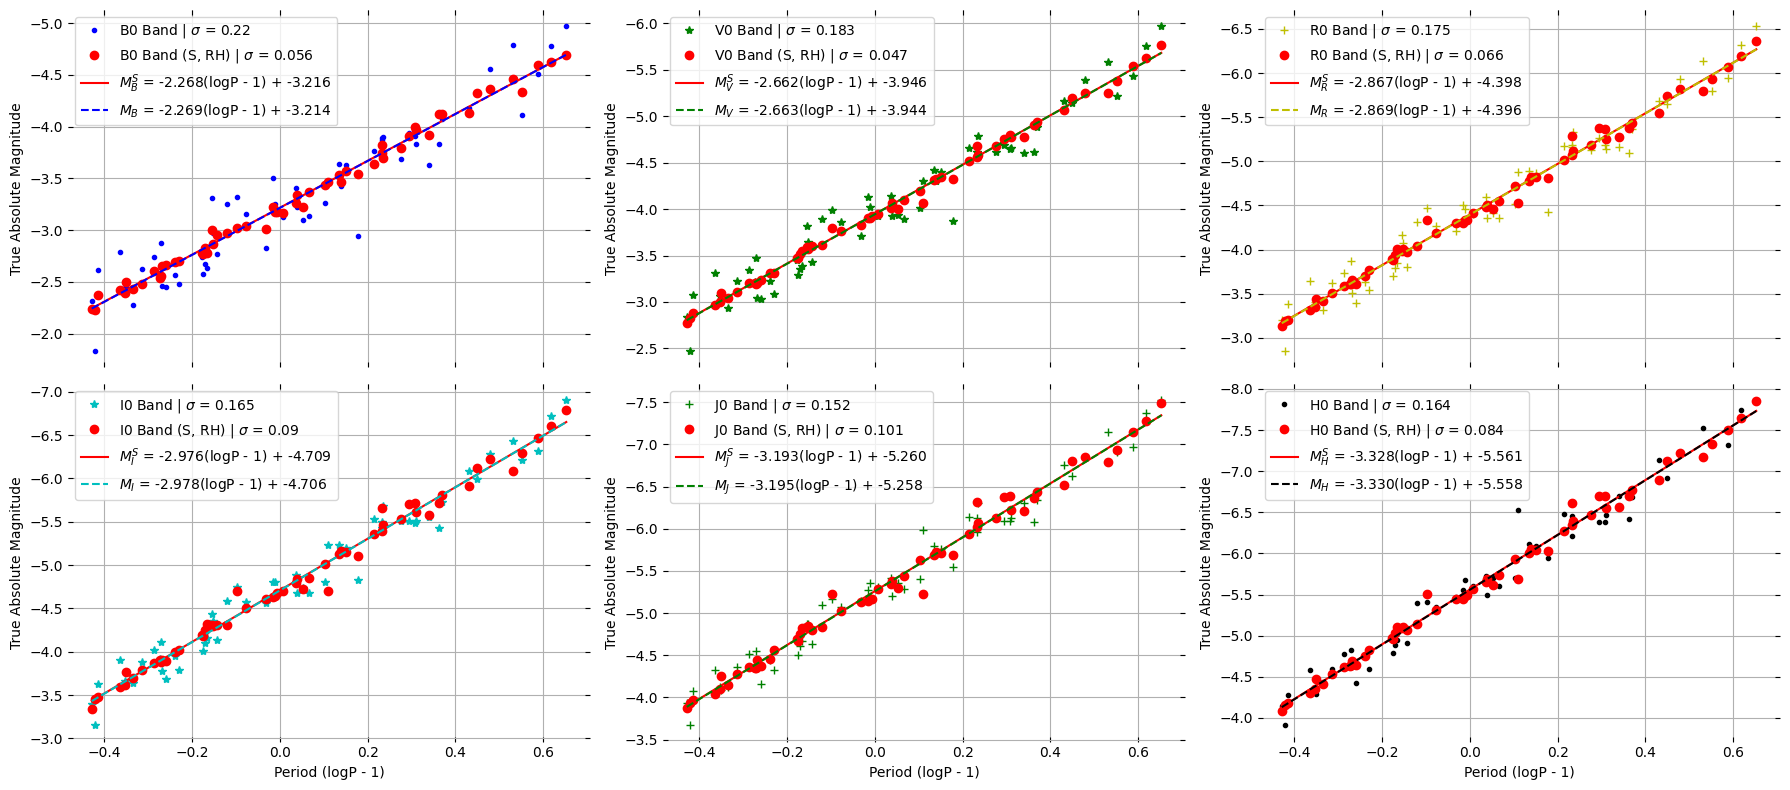

II IRSB sigma RH [0.056 0.047 0.066 0.09  0.101 0.084 0.081]


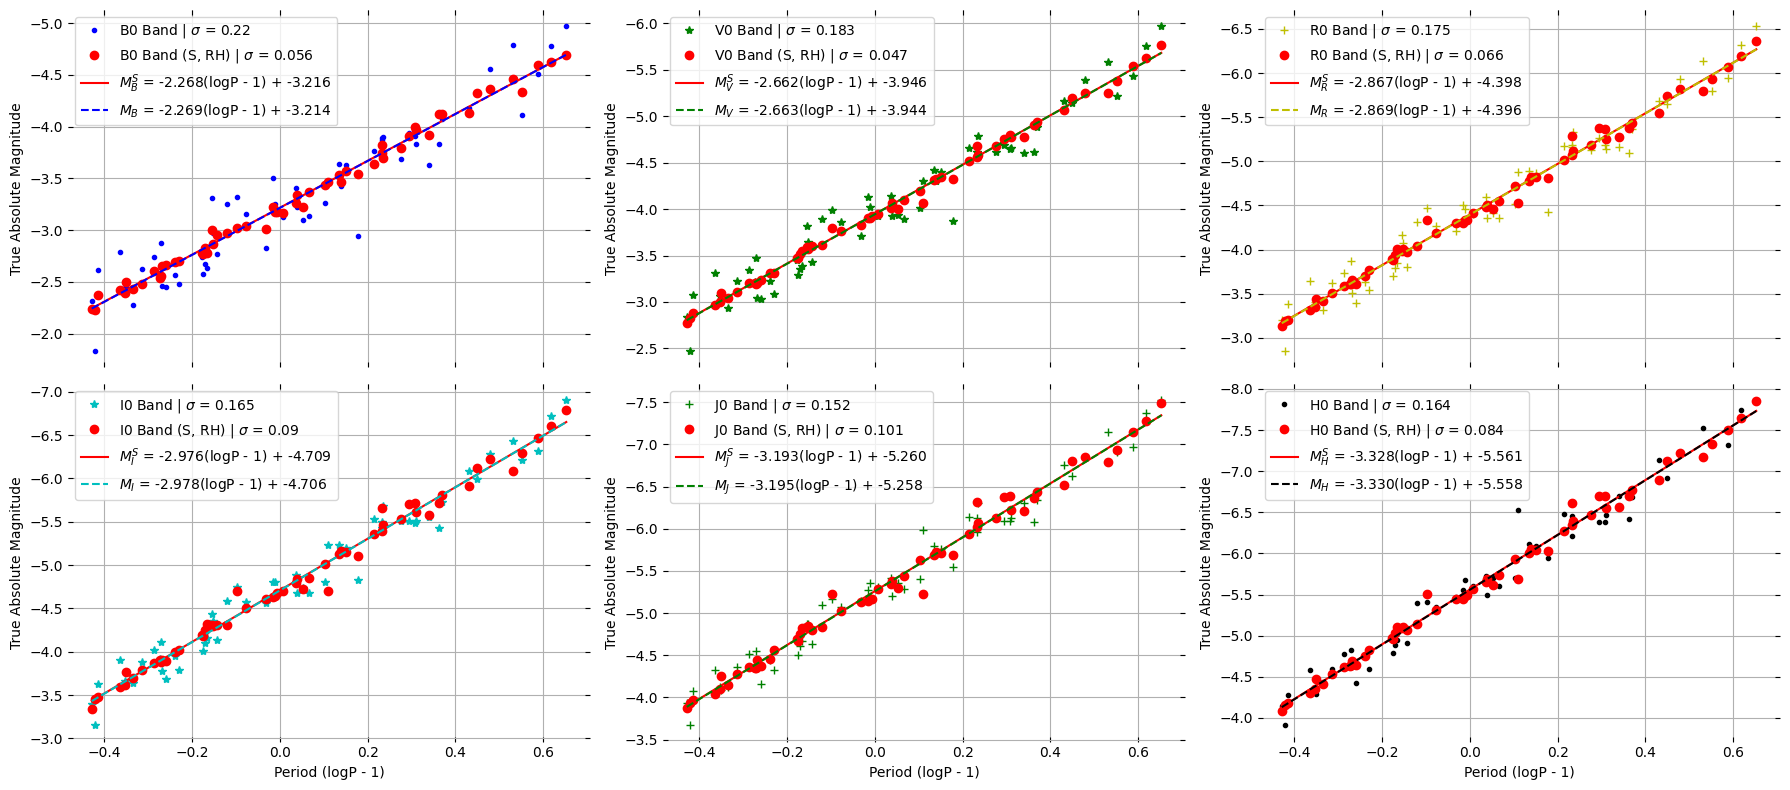

In [ ]:
from lvtlaw.g_result import plotresultPL6, plotresultcleanPL6, plotresultPL6_, plotresultPL6_compare

#jesper = pd.read_csv(f'./data/processed/{file_name[:-2]}{dis_flag[0]}_3.23/2_PLPW/{file_name[:3]}_merged_data.csv')
#reg = pd.read_csv(f'./data/processed/{file_name[:-2]}{dis_flag[0]}_3.23/2_PLPW/{file_name[:3]}_5_regression.csv')
#print(jesper.info())
#dd = ['BV','VI','VJ','VK','IJ','IH','IK', 'JK', 'JH', 'HK']
dd = ['VK','IH', 'IK', 'JH', 'JK']
dd=['IJ', 'IH', 'JH', 'JK]
print(file_name, dis_flag[0])
for col in wes_show:
    print('I Gaia sigma', col , r_reg_p[[f'{m}0{col}S' for m in mag]].iloc[4].values)
    plotresultPL6_(result_p, r_reg_p, col, dis_flag[0], 'S', '0',0)
    print('II IRSB sigma' , col, r_reg_j[[f'{m}0{col}S' for m in mag]].iloc[4].values)
    plotresultPL6_(result_j, r_reg_j, col, dis_flag[1], 'S', '0',0)

VJ


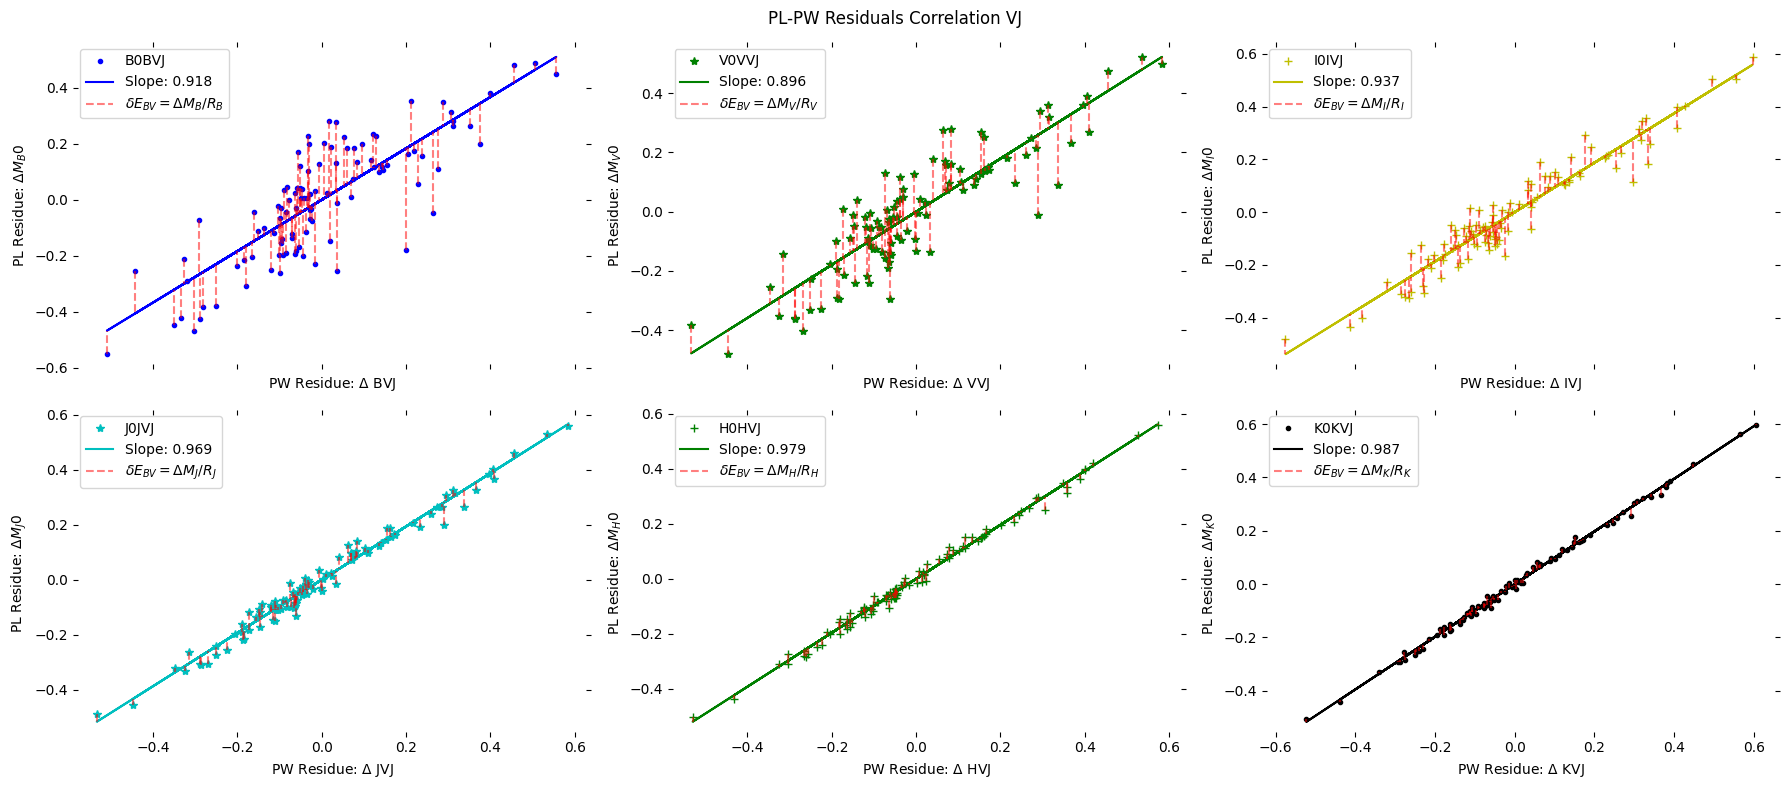

IJ


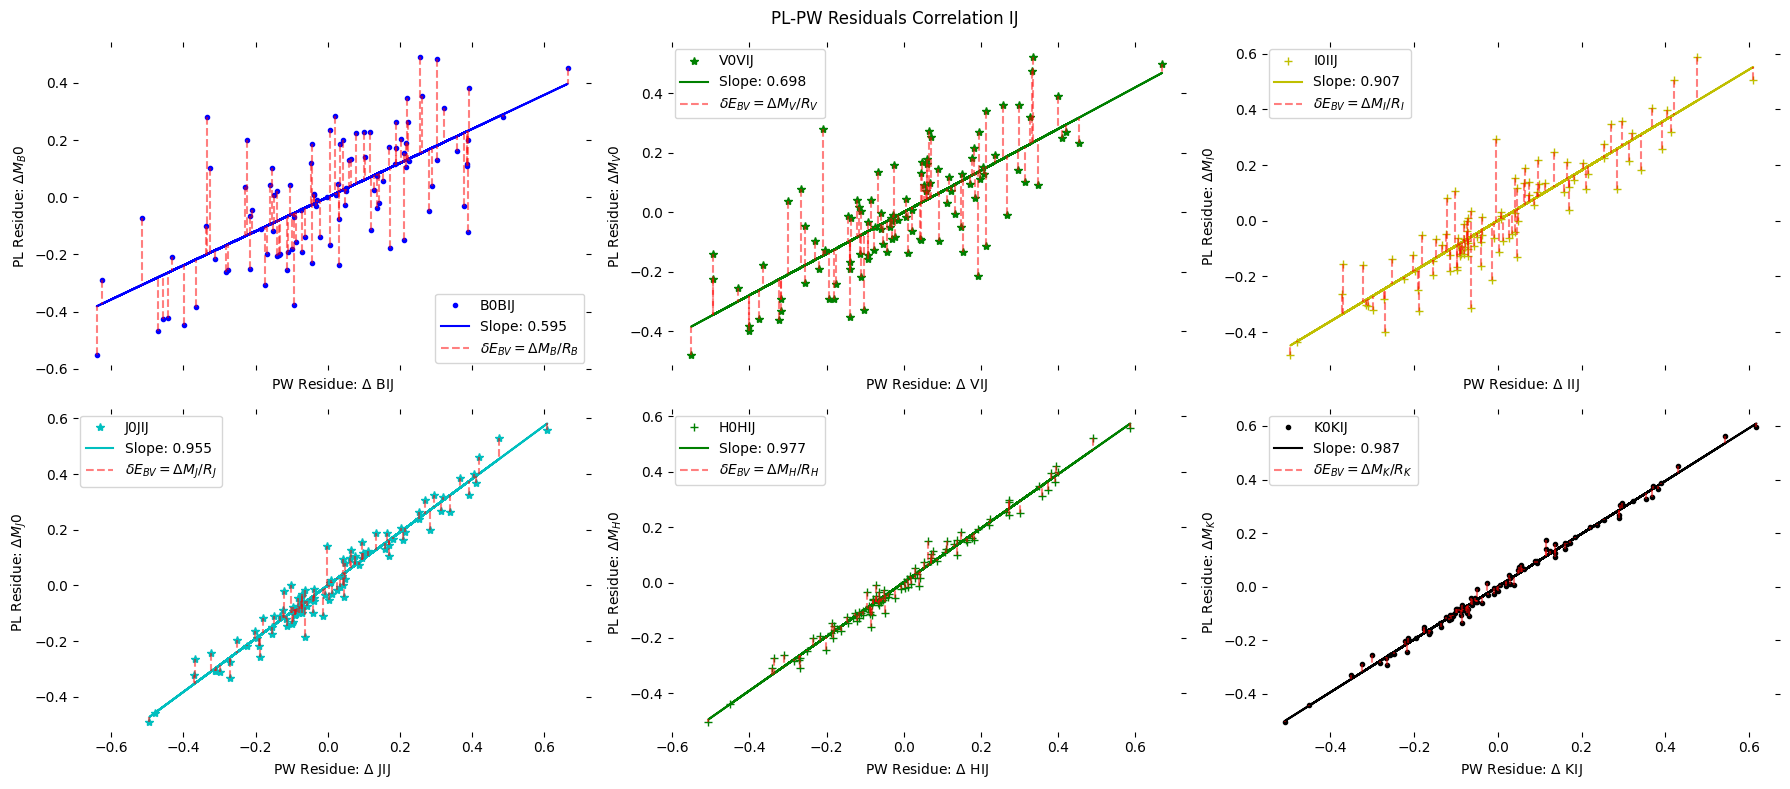

IH


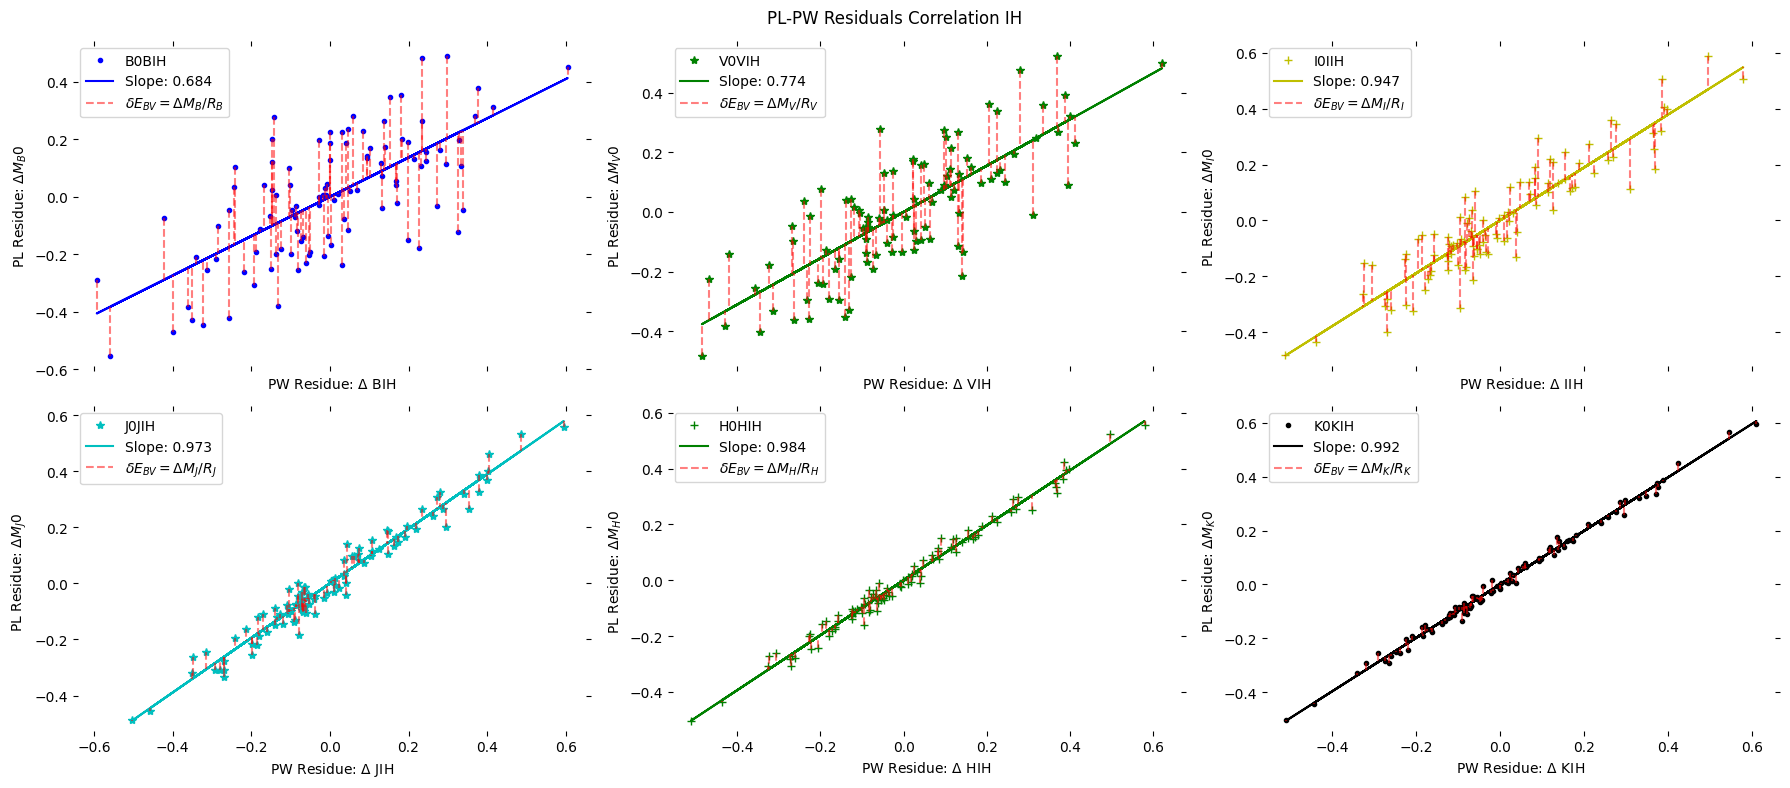

JH


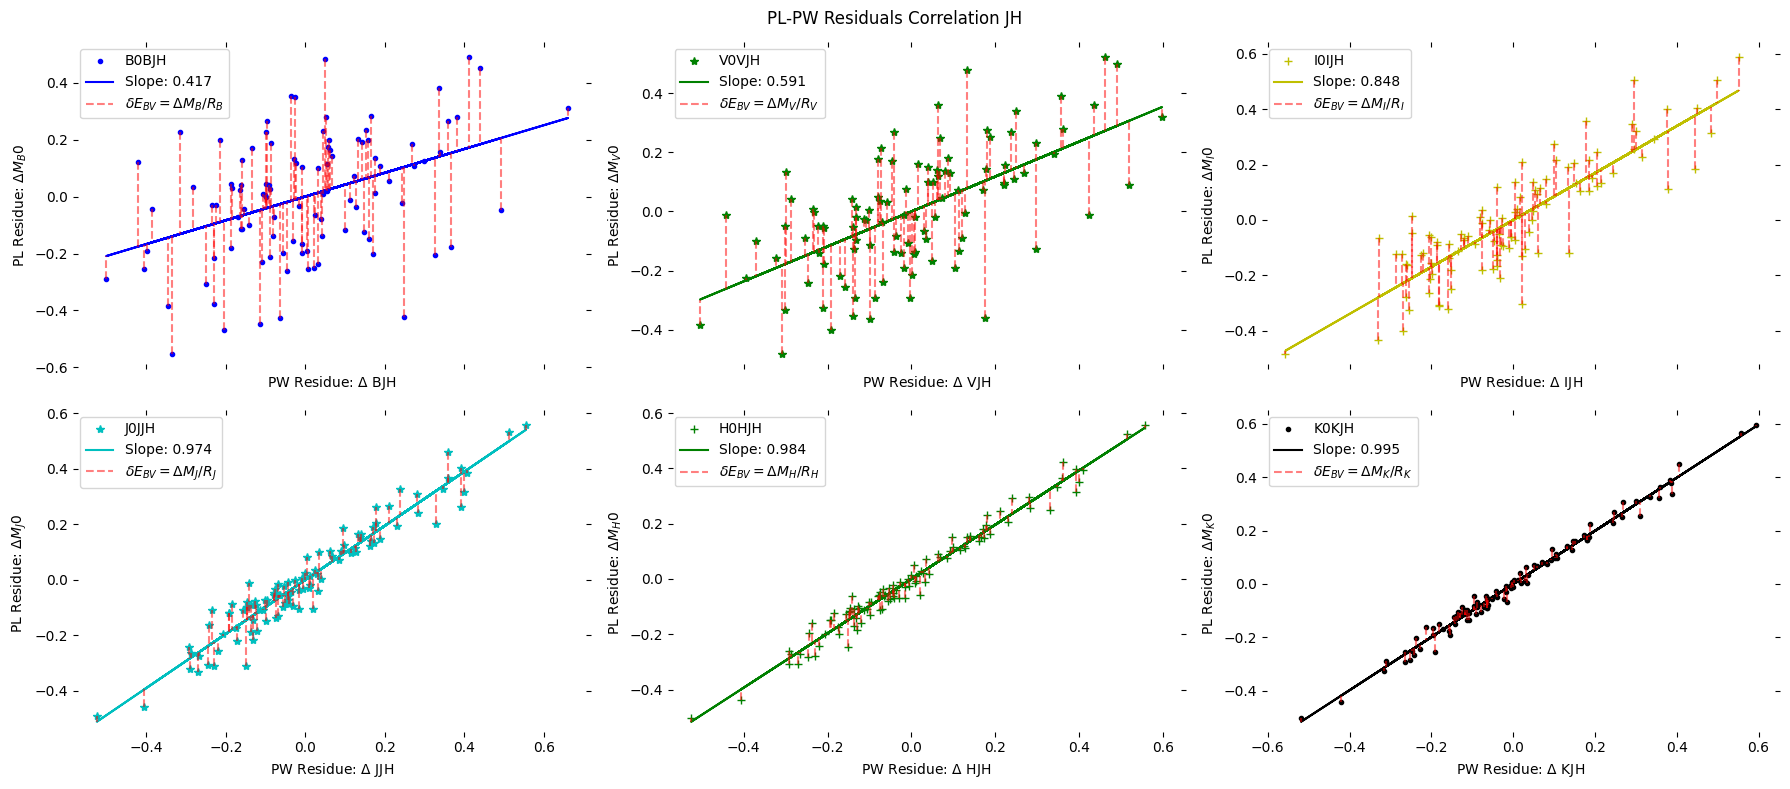

JK


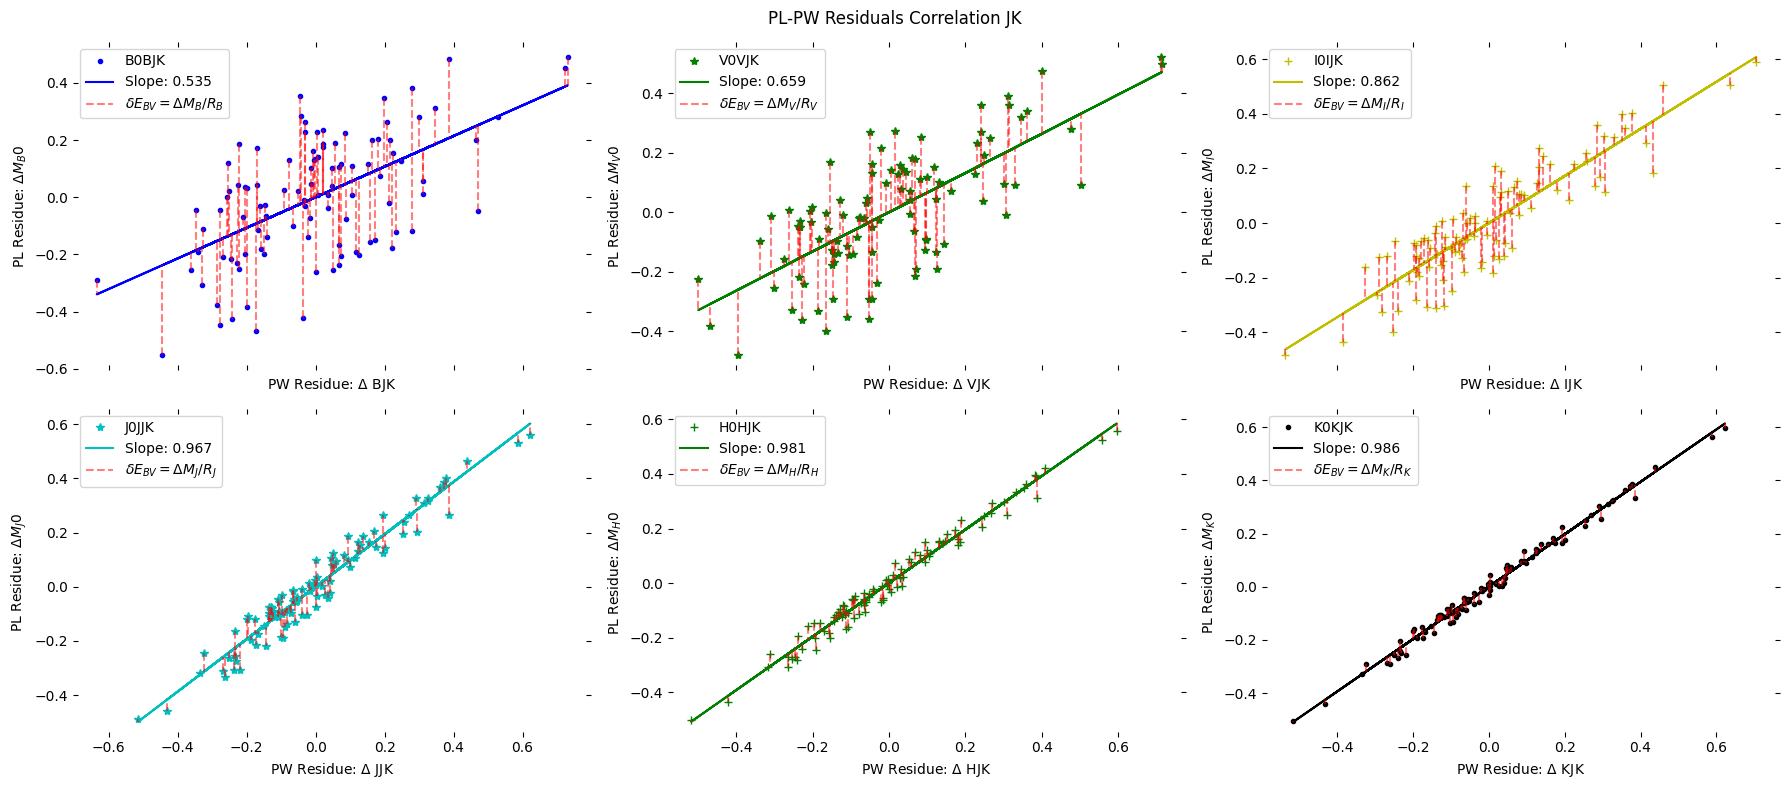

VJ


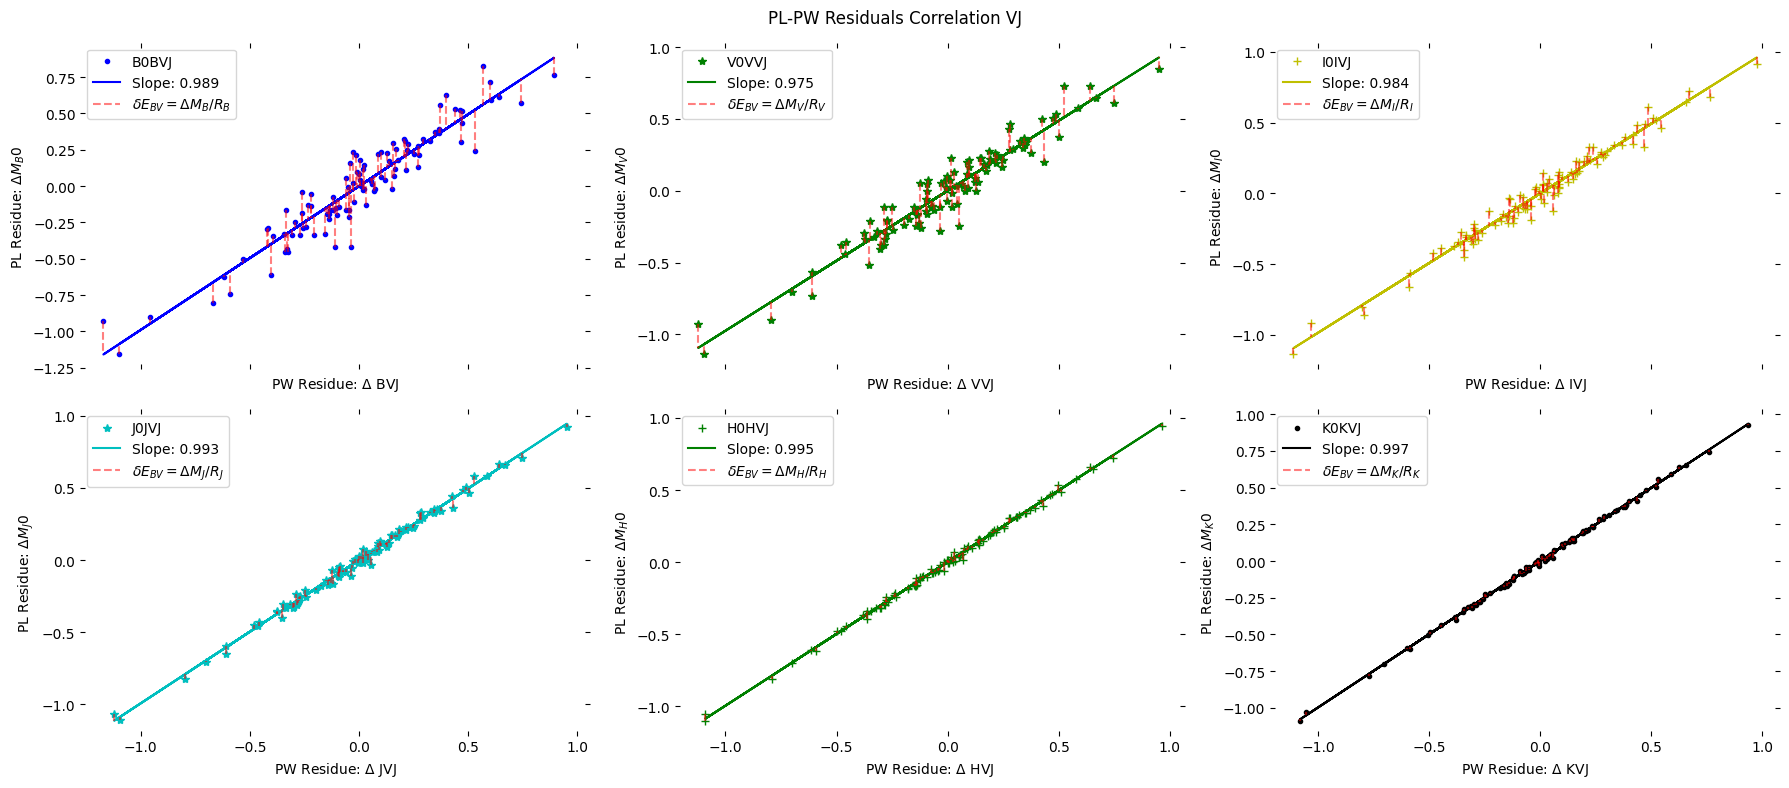

IJ


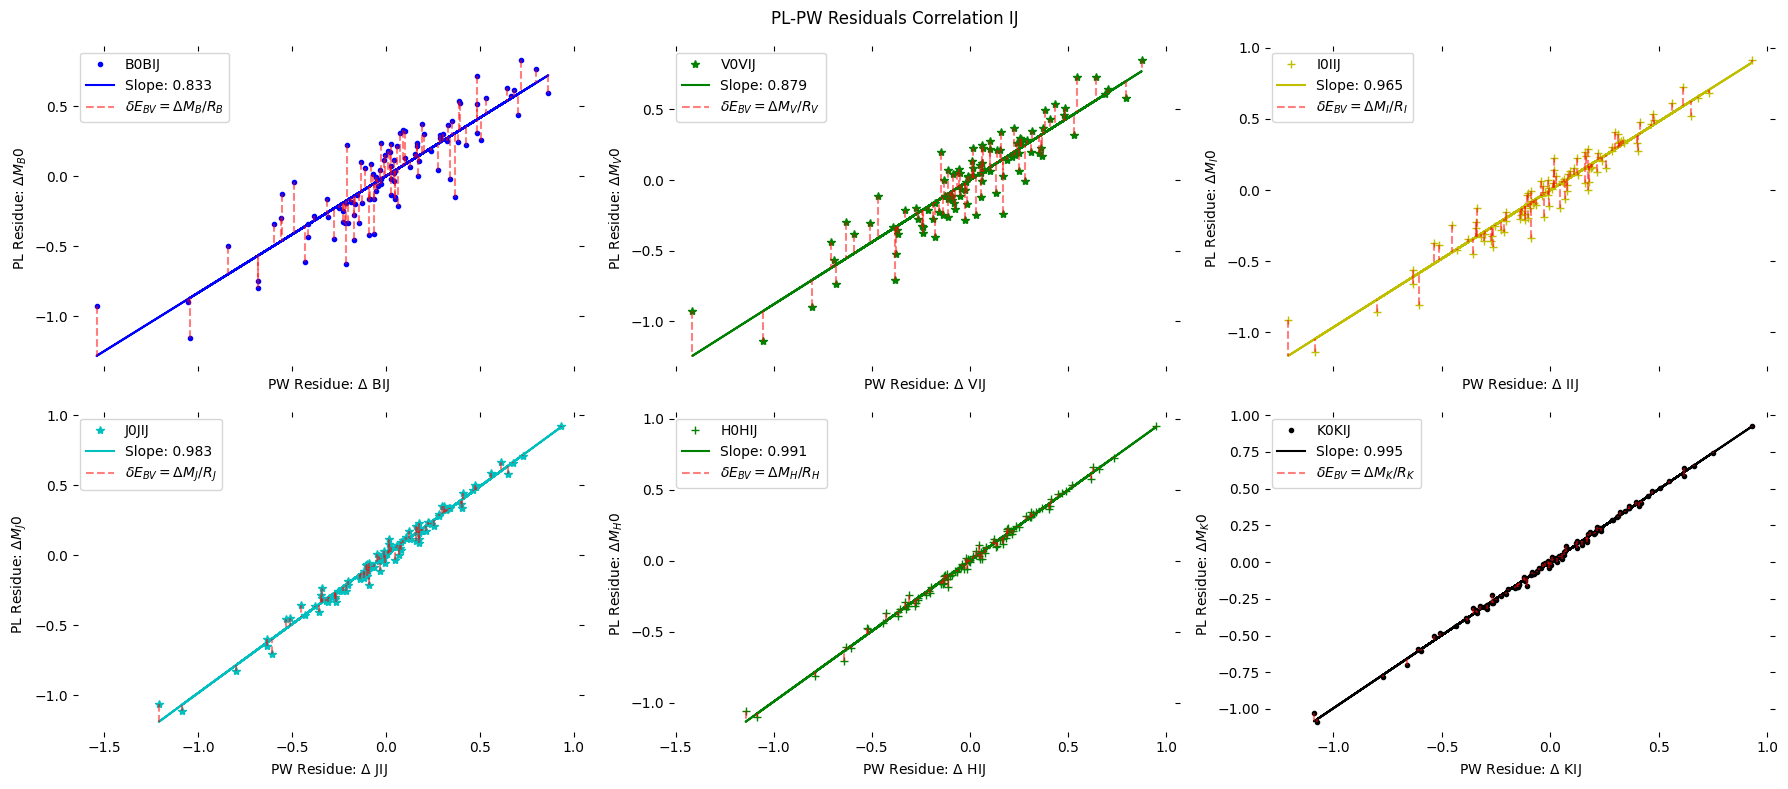

IH


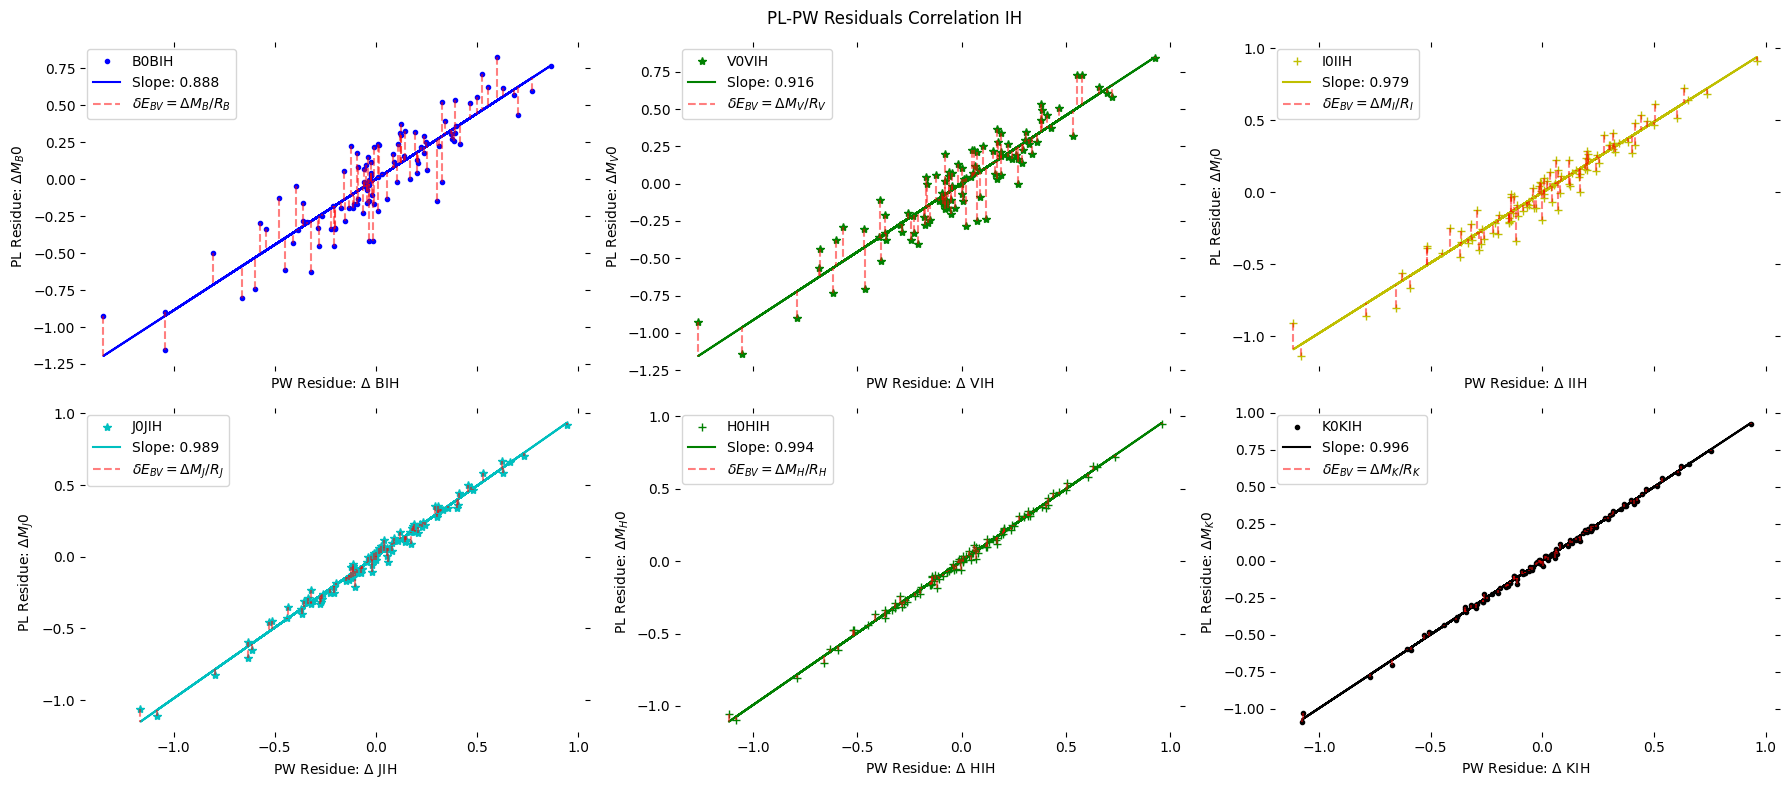

JH


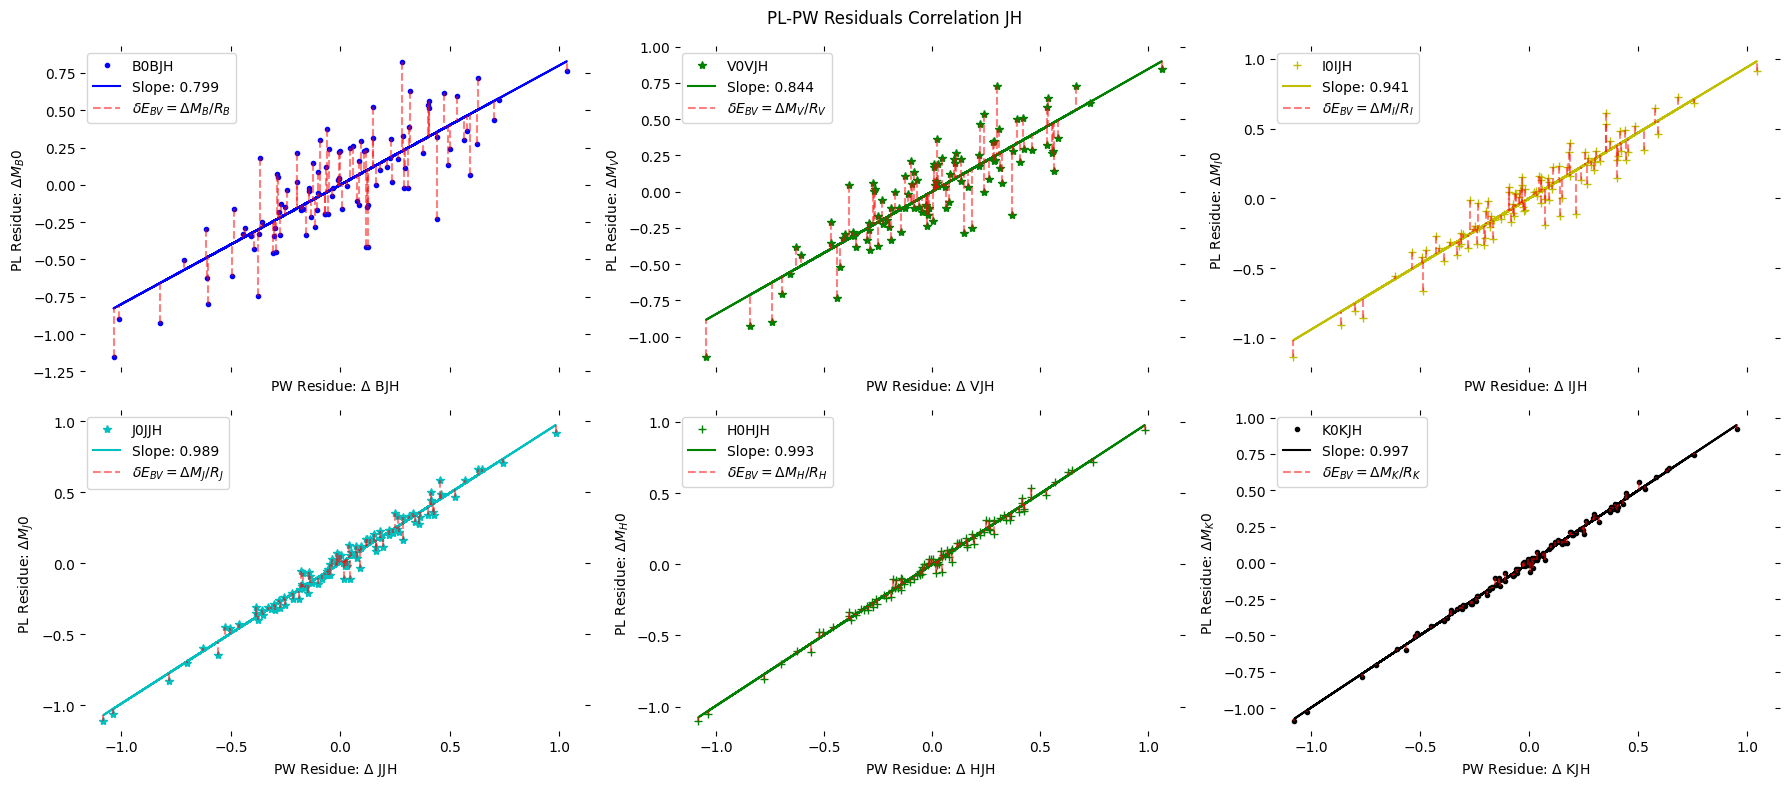

JK


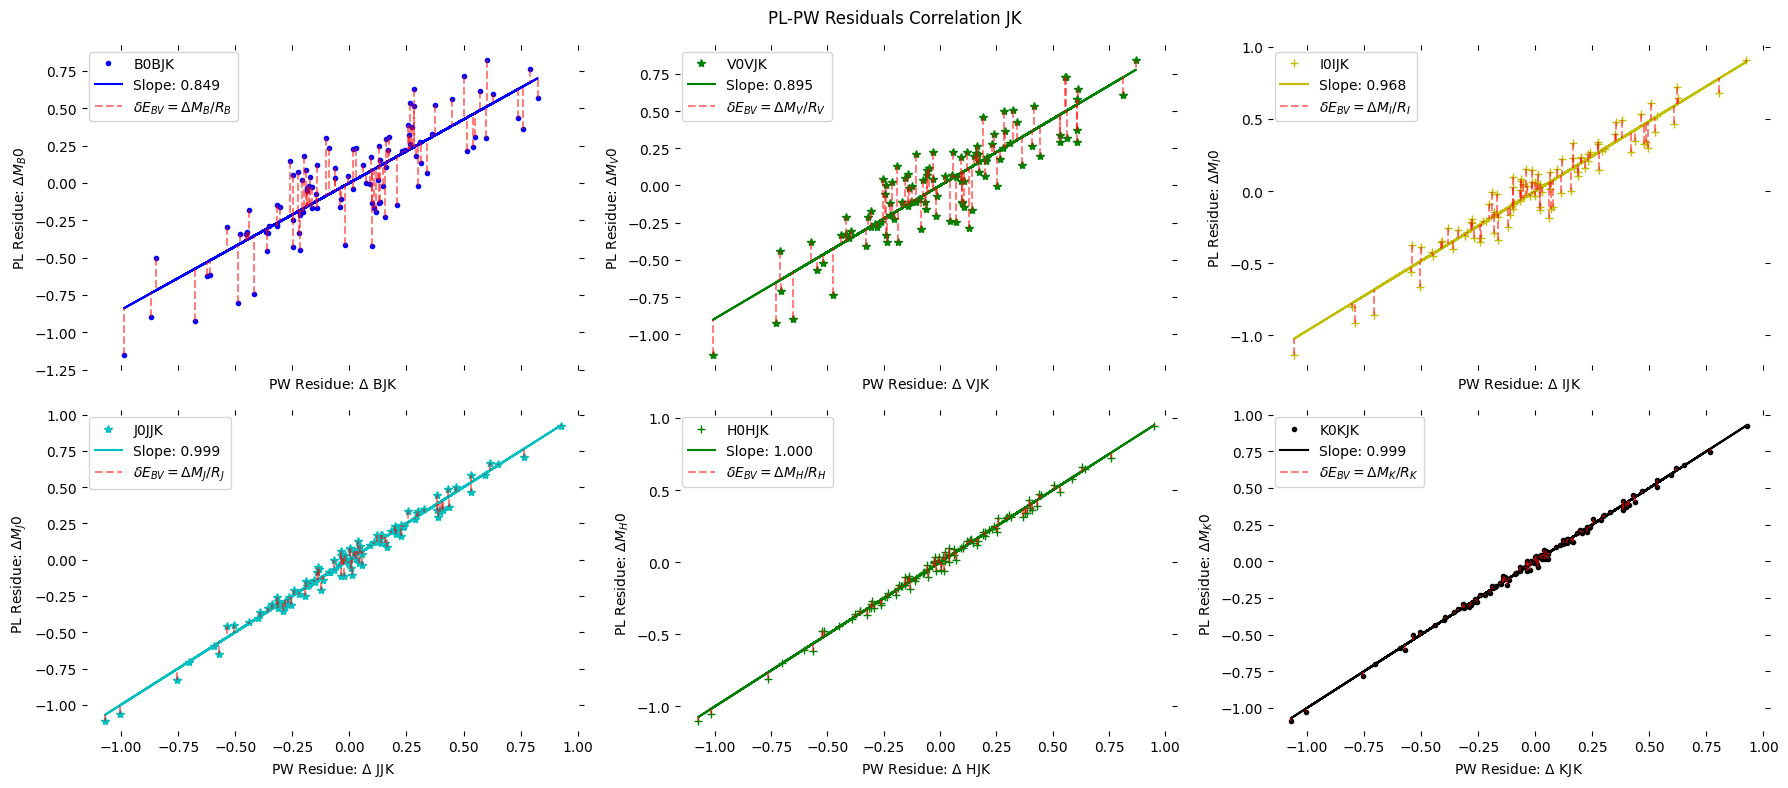

[None, None, None, None, None]

In [29]:
from lvtlaw.d_del_del import *
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import *
n=103
dis_flag = ['_p', '_j']
dis_list = ['IRSB', 'gplx']
file_name = f'{n}_IRSB_plx'

data_out_p=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
data_out_j=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}/'
dmc, dpre, dres, merged_data = residual_correlation_(data_out_p, n) 
[plotdeldel6(merged_data, dmc, col, dis_flag[0], 'S', '0', 0) for col in dd]

dmc, dpre, dres, merged_data = residual_correlation_(data_out_j, n) 
[plotdeldel6(merged_data, dmc, col, dis_flag[1], 'S', '0', 0) for col in dd]

In [14]:
dres

Unnamed: 0     name      logP    EBV  d_B0BBV_j  d_V0VBV_j  d_I0IBV_j  \
0             0  ZetaGem  1.006497  0.014   0.101601   0.080639   0.077426   
1             1    YZAur  1.259902  0.538   0.030587   0.024346   0.034099   
2             2    BMPer  1.360896  0.871   0.405787   0.322834   0.195236   
3             3    WWMon  0.668580  0.605   0.064799   0.051652   0.022459   
4             4    CSVel  0.771201  0.737   0.095555   0.076102   0.054971   
..          ...      ...       ...    ...        ...        ...        ...   
113         113     xSgr  0.845893  0.237  -0.718736  -0.571697  -0.392397   
114         114    dCeph  0.729678  0.075  -0.408174  -0.324758  -0.221738   
115         115   etaAql  0.855930  0.129  -0.257987  -0.205292  -0.147093   
116         116  betaDor  0.993131  0.051  -0.152724  -0.121602  -0.084853   
117         117     lCar  1.550816  0.146   0.284271   0.225913   0.166955   

     d_J0JBV_j  d_H0HBV_j  d_K0KBV_j  ...  d_I0IJK_j  d_J0JJK_j  d_H0HJK_j  \
0     0.039770   0.023444   0.015954  ...   0.141292   0.069715   0.042515   
1    -0.014063  -0.012237  -0.008144  ...   0.319647   0.156964   0.096177   
2     0.113032   0.069759   0.047796  ...   0.135680   0.067489   0.041495   
3    -0.011325  -0.010182  -0.008846  ...  -0.115247  -0.065833  -0.039902   
4     0.025787   0.016872   0.011159  ...   0.070089   0.035068   0.021439   
..         ...        ...        ...  ...        ...        ...        ...   
113  -0.210991  -0.130730  -0.089014  ...  -0.143072  -0.067737  -0.041663   
114  -0.112592  -0.069208  -0.046112  ...  -0.004542   0.002768   0.001437   
115  -0.076824  -0.047541  -0.031965  ...  -0.008290  -0.001627  -0.001191   
116  -0.049115  -0.032258  -0.022348  ...   0.070890   0.034931   0.021246   
117   0.091639   0.056198   0.039093  ...   0.194813   0.097593   0.059581   

     d_K0KJK_j  d_B0BHK_j  d_V0VHK_j  d_I0IHK_j  d_J0JHK_j  d_H0HHK_j  \
0     0.028811   0.109544   0.087715   0.088639   0.045983   0.027406   
1     0.065113   0.092934   0.085627   0.078981   0.010347   0.004203   
2     0.028067   0.158933   0.084060  -0.003407  -0.002260  -0.003190   
3    -0.027254  -0.262088  -0.260792  -0.262357  -0.183811  -0.122246   
4     0.014620   0.326739   0.298334   0.248520   0.140008   0.089555   
..         ...        ...        ...        ...        ...        ...   
113  -0.028153  -0.272200  -0.139531  -0.036157  -0.003065   0.001776   
114   0.001064  -0.123863  -0.050446   0.010382   0.024881   0.019513   
115  -0.000752  -0.054220  -0.008326   0.017074   0.019740   0.014406   
116   0.014391  -0.010903   0.016029   0.026588   0.014566   0.007969   
117   0.040373   0.150865   0.096109   0.065612   0.033535   0.020062   

     d_K0KHK_j  
0     0.018584  
1     0.002849  
2    -0.002167  
3    -0.082866  
4     0.060698  
..         ...  
113   0.001207  
114   0.013233  
115   0.009771  
116   0.005409  
117   0.013607  

[118 rows x 94 columns]

In [ ]:
x = pd.DataFrame()
x['name'] = g.name
x['logP'] = g['logP']
x['devmu'] = g.muS0VJ_p - i.muS0VJ_j 

y = x[(x['logP'] > 0.8) & (x['logP'] < 1.1) & (x['devmu'] < -0.2) ]

y

name      logP     devmu
67  VXPer  1.036883 -0.301254

# Test: LMC-SMC Distance 

In [ ]:
import pandas as pd 
from data.datamapping import mag
LMC = pd.read_csv('data/processed/29_LMC_3.4/8_result/29_merged_data.csv')
SMC = pd.read_csv('data/processed/32_SMC_VIJK_2.53/8_result/32_merged_data.csv')
SMC.head()

* * datamapping module loaded!


Unnamed: 0    name      logP    EBV    IRSB   M_V_s   M_I_s   M_J_s  \
0           0  HV1328  1.199692  0.016  18.395  14.122  13.401  12.962   
1           1  HV1333  1.212084  0.024  19.255  14.682  13.841  13.253   
2           2  HV1335  1.157800  0.024  18.624  14.761  13.963  13.428   
3           3  HV1345  1.129670  0.031  18.731  14.747  13.992  13.437   
4           4   HV822  1.223807  0.039  19.078  14.517  13.654  13.107   

    M_K_s    M_V0_s  ...  p_J0VKS_s  p_J0IJS_s  p_J0IKS_s  p_J0JKS_s  \
0  12.567  14.08152  ...  13.196631  13.196837  13.193118  13.191066   
1  12.771  14.62128  ...  13.159271  13.159473  13.156921  13.153495   
2  12.961  14.70028  ...  13.322930  13.323151  13.315485  13.318075   
3  12.947  14.66857  ...  13.407739  13.407969  13.397653  13.403360   
4  12.596  14.41833  ...  13.123927  13.124125  13.122678  13.117953   

   p_K0VIS_s  p_K0VJS_s  p_K0VKS_s  p_K0IJS_s  p_K0IKS_s  p_K0JKS_s  
0  12.717409  12.716930  12.716234  12.716640  12.712605  12.709728  
1  12.677001  12.676477  12.675843  12.676246  12.673432  12.669087  
2  12.854012  12.853686  12.852781  12.853196  12.845035  12.847115  
3  12.945740  12.945515  12.944470  12.944892  12.933960  12.939369  
4  12.638774  12.638208  12.637632  12.638032  12.636373  12.630641  

[5 rows x 249 columns]

In [ ]:
M_L, M_S = pd.DataFrame(),pd.DataFrame()
for a in mag:
    M_L[a] = slp[a]*(LMC['logP']-1) + intr[a]
    M_S[a] = slp[a]*(SMC['logP']-1) + intr[a]

NameError: name 'slp' is not defined

In [ ]:
disL = pd.DataFrame()
disS = pd.DataFrame()
for m in ['V', 'I', 'J', 'K']:
    disL[m] = LMC[f'M_{m}0_l'] - M_L[m]
    disS[m] = SMC[f'M_{m}0_s'] - M_S[m]
print(disL.mean())
print(disS.mean())

KeyError: 'V'